<a href="https://colab.research.google.com/github/justaplan/stack_overflow_survey_analysis/blob/master/stack_overflow_survey_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive

drive.mount("/content/gdrive" , force_remount=True)

%cd "/content/gdrive/My Drive/Python/List of CSV"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Python/List of CSV


In [6]:
df_schema = pd.read_csv("survey_results_schema.csv", index_col="Column")
df = pd.read_csv("survey_results_public.csv")

**<h1>Chart Plotting</h1>**

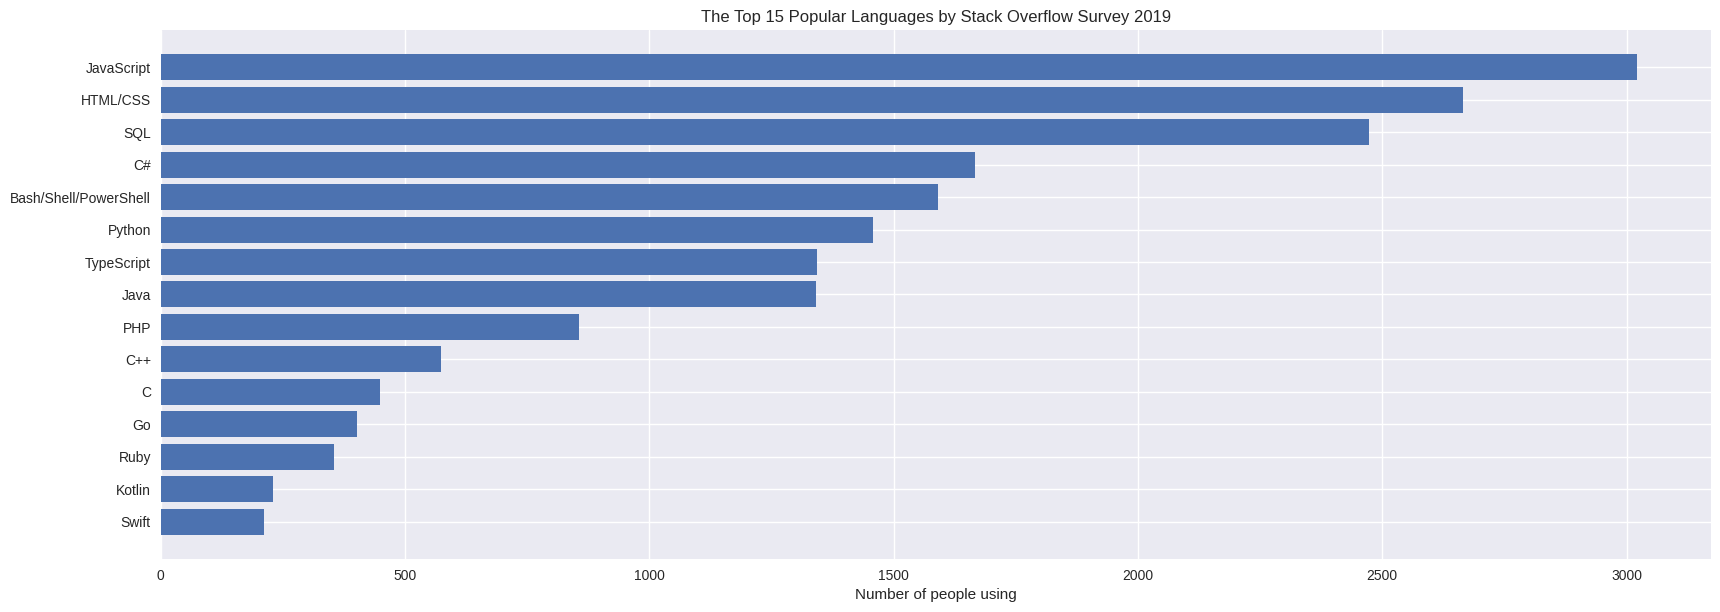

In [8]:
df = df.dropna()

id = df["Respondent"]
lang_responses = df["LanguageWorkedWith"]

language_counter = Counter()

for response in lang_responses:
  language_counter.update(response.split(";"))

languages = []
popularity = []

for item in language_counter.most_common(15):
  languages.append(item[0])
  popularity.append(item[1])

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Chart Plotting
plt.barh(languages[::-1],popularity[::-1])

## Chart Title and Labelling
plt.title("The Top 15 Popular Languages by Stack Overflow Survey 2019")
plt.xlabel("Number of people using")
plt.show()